# Computational Methods in Ordinary Differential Equations

*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
# Use of Explicit Runge-Kutta Methods to solve Initial Value Problems

Runge-Kutta methods are used to solve Initial Value Problems (IVP) of the form

\begin{align*}
    y' &= f(t, y), & t &\in [t_{\min}, t_{\max}], & y(t_{\min}) &= y_0,
\end{align*}

Where $y'=f(t,y)$ is a first-order ODE defined over the domain $t\in [t_{\min}, t_{\max}]$ and the initial solution $y(t_{\min})$ is the known value $y_0$. 

## Second-order explicit Runge-Kutta method

The second-order explicit [**Runge-Kutta** method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), also known as **RK2** for short, for solving an IVP is

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{2}(k_1 + k_2),\\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + h, y_n + hk_1),
\end{align*}

or alternatively using by the Butcher tableau

$$\begin{array}{c|cc} 0 & 0 \cr 1 & 1 \cr \hline & \frac{1}{2} & \frac{1}{2} \end{array}$$

The **stage** values $k_1$ and $k_2$ are calculated using known values of $t_n$, $y_n$ and the step length $h$ substituted into the ODE function $f(t_, y)$. Then the solution over one step $t_{n+1} = t_n + h$ and $y_{n+1} = y(t_{n+1})$ is calculated using $k_1$ and $k_2$.

#### Example 1

Calculate a single step of length $h=0.5$ of the RK2 method to calculate the solution of the following IVP

\begin{align*}
    y' &= \sin^2(t)y, & t &\in [0, 5], & y_0 &= 1. & (1)
\end{align*}

Since $t_0=0$, $y_0=1$ and $h=0.5$ the stage values are:

\begin{align*}
    k_1 &= \sin^2(t_0)y_0  = \sin^2(0)(1) = 0, \\
    k_2 &=  \sin^2(t_0 + h)(y_0 + hk_1) = \sin^2(0 + 0.5)(1 + 0.5(0)) = 0.2298.
\end{align*}

Calculate the solution over one step:

\begin{align*}
    y_1 &= y_0 + \frac{h}{2}(k_1 + k_2) = 1 + \frac{0.5}{2}(0 + 0.2298) = 1.0575.
\end{align*}

#### Example 2

Calculate the solution of the IVP from [equation (1)](#Example-1) over the domain $t\in [0,5]$ using the RK2 method with a step length of $h=0.5$.

The code below defines a function `rk2` that solves an IVP using the second-order explicit Runge-Kutta method. The input arguments are `f` is the name of the funcion the defines the ODE, `tspan` is a two-element array containing the lower and upper bounds of the $t$ domain, `y0` is the initial value of $y$ at the lower bound and `h` is the step length.

In [1]:
import numpy as np

def rk2(f, tspan, y0, h):

    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h, y[n] + h * k1)
        y[n+1] = y[n] + 0.5 * h * (k1 + k2)
        t[n+1] = t[n] + h
    
    return t, y

The function below defines $f(t,y)$ for the ODE from equation (4).

In [2]:
def f(t, y):
    return y * np.sin(t)**2

The exact solution to this IVP is $y(t) = e^{\frac{1}{2}(t - \sin(t)\cos(t)}$ and defined by the function below.

In [3]:
def exact_sol(t):
    return np.exp(0.5 * (t - np.sin(t) * np.cos(t)))

The program below invokes the RK2 method to solve this IVP and compares it to the exact solution.

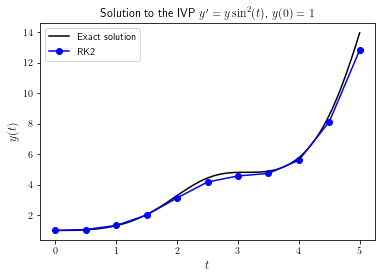

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Define IVP parameters
tspan = [ 0, 5 ]
y0 = 1
h = 0.5

# Invoke the RK2 method to solve IVP
t, y = rk2(f, tspan, y0, h)

# Calculate exact solution
t1 = np.linspace(tspan[0], tspan[1], 100)
y1 = exact_sol(t1)

# Plot solutions
fig, ax = plt.subplots()

ax.plot(t1, y1, 'k-', label='Exact solution')
ax.plot(t, y, 'bo-', label='RK2')

ax.set_title("Solution to the IVP $y'=y\sin^2(t)$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

The solution computed using the RK2 shows resonable aggreement with the exact solution but there are still noticeable errors.

---
## Fourth-Order Explicit Runge-Kutta Method

The fourth-order explicit [**Runge-Kutta** method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), also known as **RK4** for short, for solving an Initial Value Problem (IVP) of the form

\begin{align*}
    y' &= f(t, y), & t &\in [t_{\min}, t_{\max}], & y(t_{\min}) &= y_0.
\end{align*}

is 

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{2}h, y_n + \tfrac{1}{2}hk_1), \\ 
    k_3 &= f(t_n + \tfrac{1}{2}h, y_n + \tfrac{1}{2}hk_2), \\
    k_4 &= f(t_n + h, y_n + hk_3).
\end{align*}

or alternatively using by the Butcher tableau

$$\begin{array}{c|cccc} 
0 & \\ 
\frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} \\
1 & 0 & 0 & 1 \\ \hline
& \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}$$

#### Example 3

Calculate a single step of length $h=0.5$ of the RK4 method to calculate the solution of the IVP in [equation (1)](#Example-1)

Calculate the stage values:

\begin{align*}
    k_1 &= \sin^2(t_0)y_0  = 1 \sin^2(0) = 0, \\
    k_2 &= \sin^2(t_0 + \tfrac{1}{2} h)(y_0 + \tfrac{1}{2} h k_1)  = \sin^2(0 + \tfrac{1}{2} (0.5)(0))(1 + \tfrac{1}{2} (0.5))  = 0.0612, \\
    k_3 &= \sin^2(t_0 + \tfrac{1}{2} h)(y_0 + \tfrac{1}{2} h k_2) = \sin^2(0 + \frac{1}{2}(0.5))(1 + \tfrac{1}{2} (0.5) (0.0612)) = 0.0621, \\
    k_4 &= \sin^2(t_0 + h)(y_0 + h k_3) = \sin^2(0 + 0.5)(1 + 0.5 (0.0621)) = 0.2370.
\end{align*}

Calculate the solution over one step:

\begin{align*}
    y_1 &= y_0 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) = 1 + \frac{0.5}{6}(0 + 2(0.0612) + 2(0.0621) + 0.2370) = 1.0403.
\end{align*}

#### Example 4

Calculate the solution of the IVP from [equation (1)](#Example-1) over the domain $t\in [0,5]$ using the RK4 method with a step length of $h=0.5$.

The code below defines a function `rk4` that solves an IVP using the fourth-order explicit Runge-Kutta method using the same input arguments as the `rk2` function defined earlier.

In [5]:
def rk4(f, tspan, y0, h):

    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + 0.5 * h, y[n] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n] + h * k3)
        y[n+1] = y[n] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        t[n+1] = t[n] + h
    
    return t, y

The program below invokes the RK4 method to solve this IVP and compares it to the exact solution.

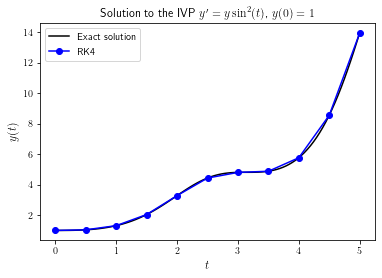

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Define IVP parameters
tspan = [ 0 , 5 ]
y0 = 1
h = 0.5

# Solve the IVP using the RK4 method
t, y = rk4(f, tspan, y0, h)

# Calculate the exact solution
t1 = np.linspace(tspan[0], tspan[1], 100)
y1 = exact_sol(t1)

# Plot solutions
fig, ax = plt.subplots()
ax.plot(t1, y1, 'k-', label='Exact solution')
ax.plot(t, y, 'bo-', label='RK4')

ax.set_title("Solution to the IVP $y'=y\sin^2(t)$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

The solution computed by the RK4 method shows very good agreement with the exact solutions. Whilst it is possible to derive higher-order Runge-Kutta methods, in practice the increased accuracy you get is not worth the additional computational cost. The RK4 method is considered the default ODE solver.